In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

## Read data

We read the Iris dataset and put it in a pandas dataframe. 

In [122]:
battery_data = pd.read_csv('standardized_battery_data.csv')

## Summarize dataset


Yo can get an idea how many data points/records (rows) and attributes/features (columns) your dataset has with *iris_data.shape()*: 

In [123]:
print(battery_data.shape)

(18, 8)


In [124]:
battery_data.head()

,Battery,Charging capacity,Discharging capacity,Charging energy,Discharging energy,Ah-efficiency,Wh-efficiency,Voltage inconsistency
0,1,5.016,4.506,6.320,1.950,-81.953,-96.724,9.177
1,2,-89.063,-89.274,-88.121,-90.679,-26.287,-54.079,18.775
2,3,17.427,16.475,20.130,13.542,-165.453,-143.077,-70.201
3,4,75.200,74.592,80.794,69.092,-95.870,-239.491,-49.468
4,5,6.025,5.078,7.316,1.781,-165.453,-120.827,-19.618


# K-means and K-means++ clustering

In [125]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_output = kmeans.fit(battery_data)

In [126]:
kmeans_output.labels_

array([1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 3, 0, 3, 2, 0, 0], dtype=int32)

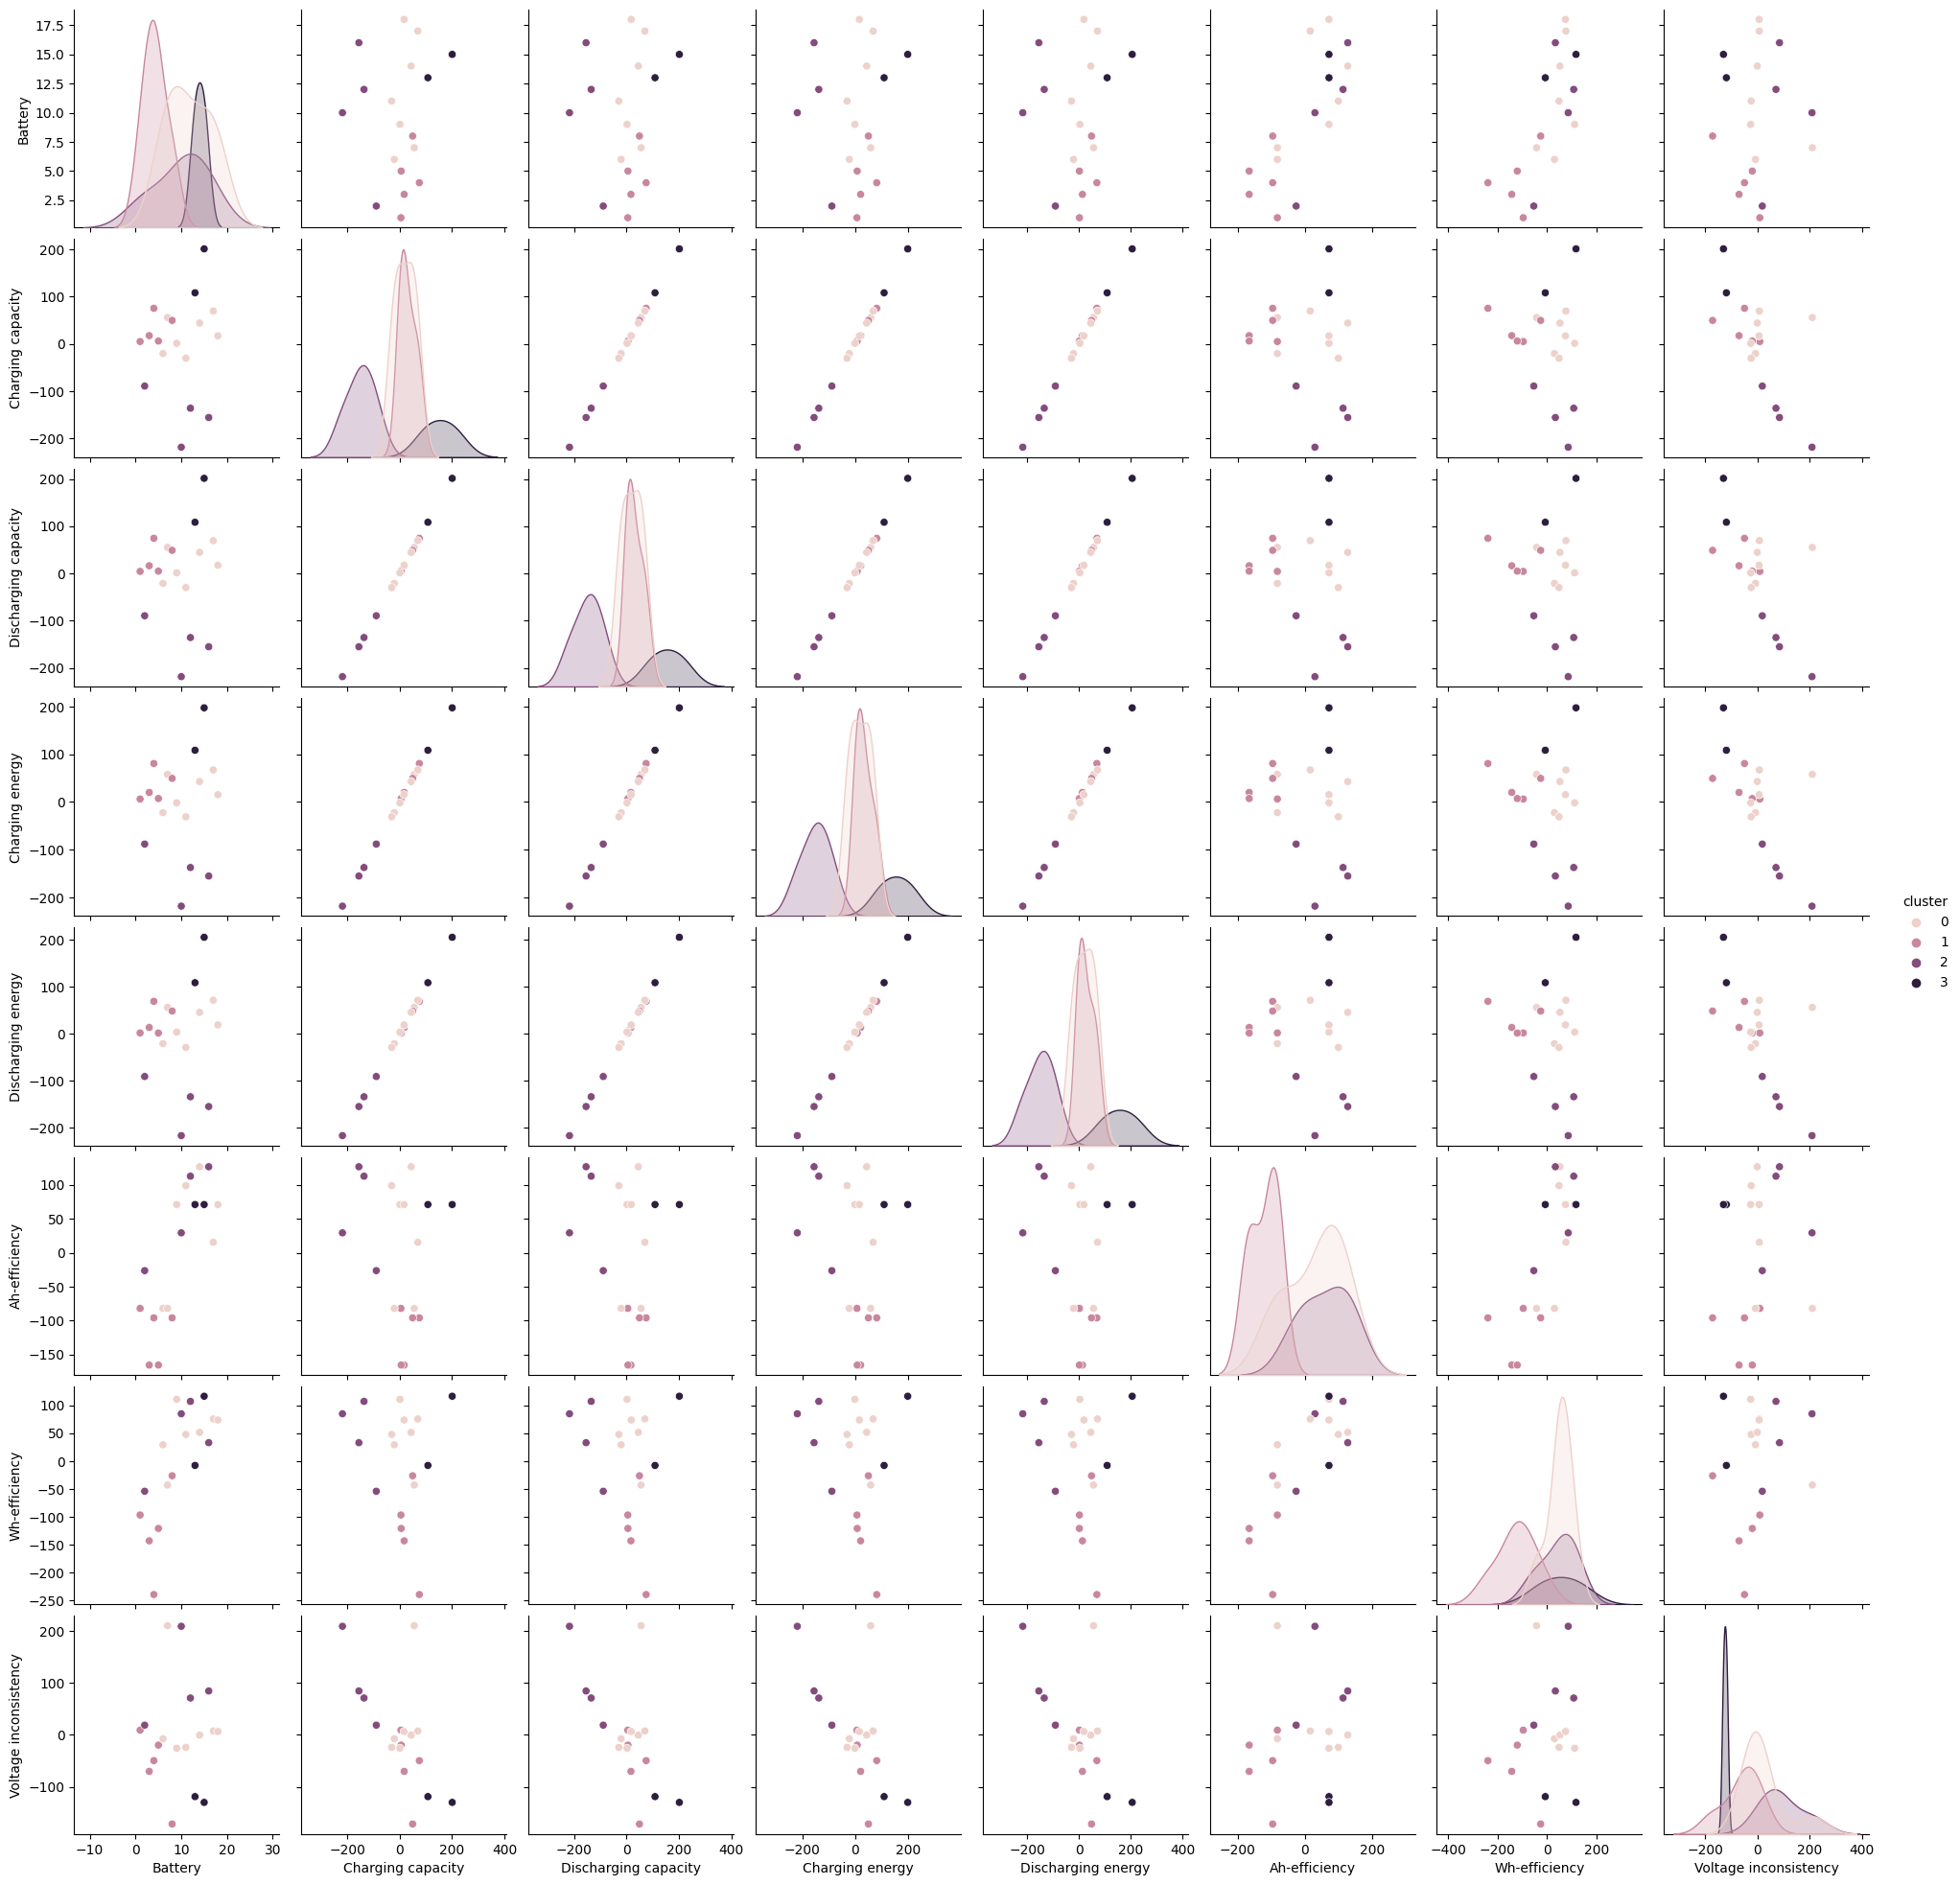

In [127]:
sns.color_palette("pastel")


battery_data["cluster"] = kmeans_output.labels_.tolist()

sns.pairplot(battery_data, hue= "cluster");
plt.show()

# Determining the optimum value of K (Elbow method)

In [128]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(battery_data)
    wcss.append(kmeans.inertia_)

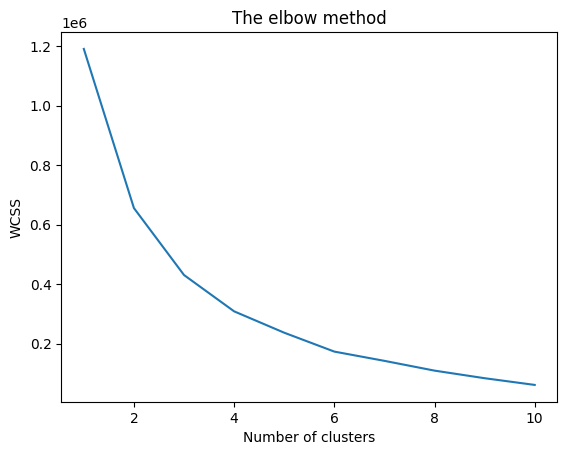

In [129]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## Perform PCA to visualize the clusters

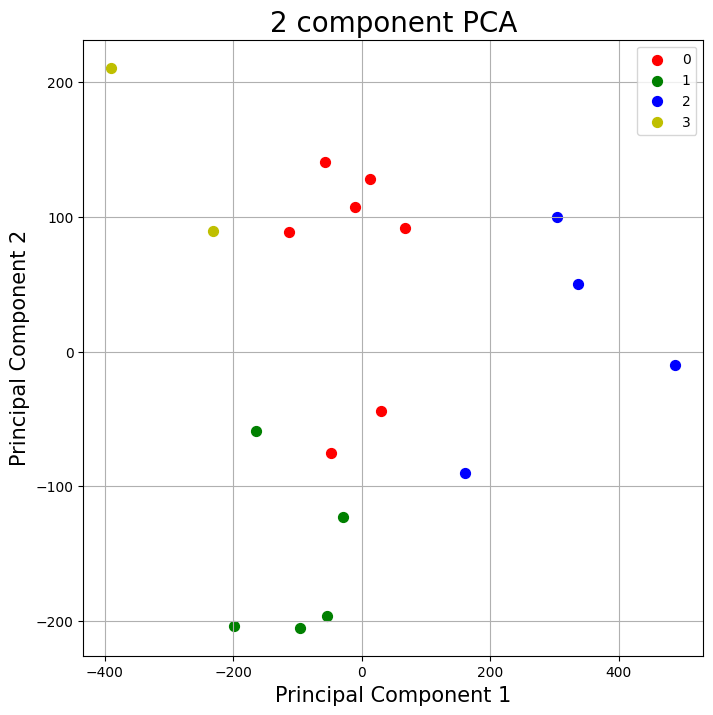

In [130]:
# PCA to reduce the dimensions of the data and visualize the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(battery_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, battery_data[['cluster']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# -------------------------------------------------------------------------------------------------------

# DBSCAN: Density based spatial clustering of applications with noise

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [145]:
battery_data = pd.read_csv('standardized_battery_data.csv')

In [146]:
dbscan = DBSCAN(eps = 100, min_samples = 2)
dbscan_output = dbscan.fit_predict(battery_data)

### Noisy samples are given the label -1

In [147]:
dbscan.labels_

array([ 0, -1,  0, -1,  0, -1, -1, -1,  1, -1,  1,  2, -1,  1, -1,  2, -1,
        1])

### Number of clusters

In [148]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

In [149]:
dbscan.core_sample_indices_

array([ 0,  2,  4,  8, 10, 11, 13, 15, 17])

In [150]:
len(dbscan.core_sample_indices_)

9

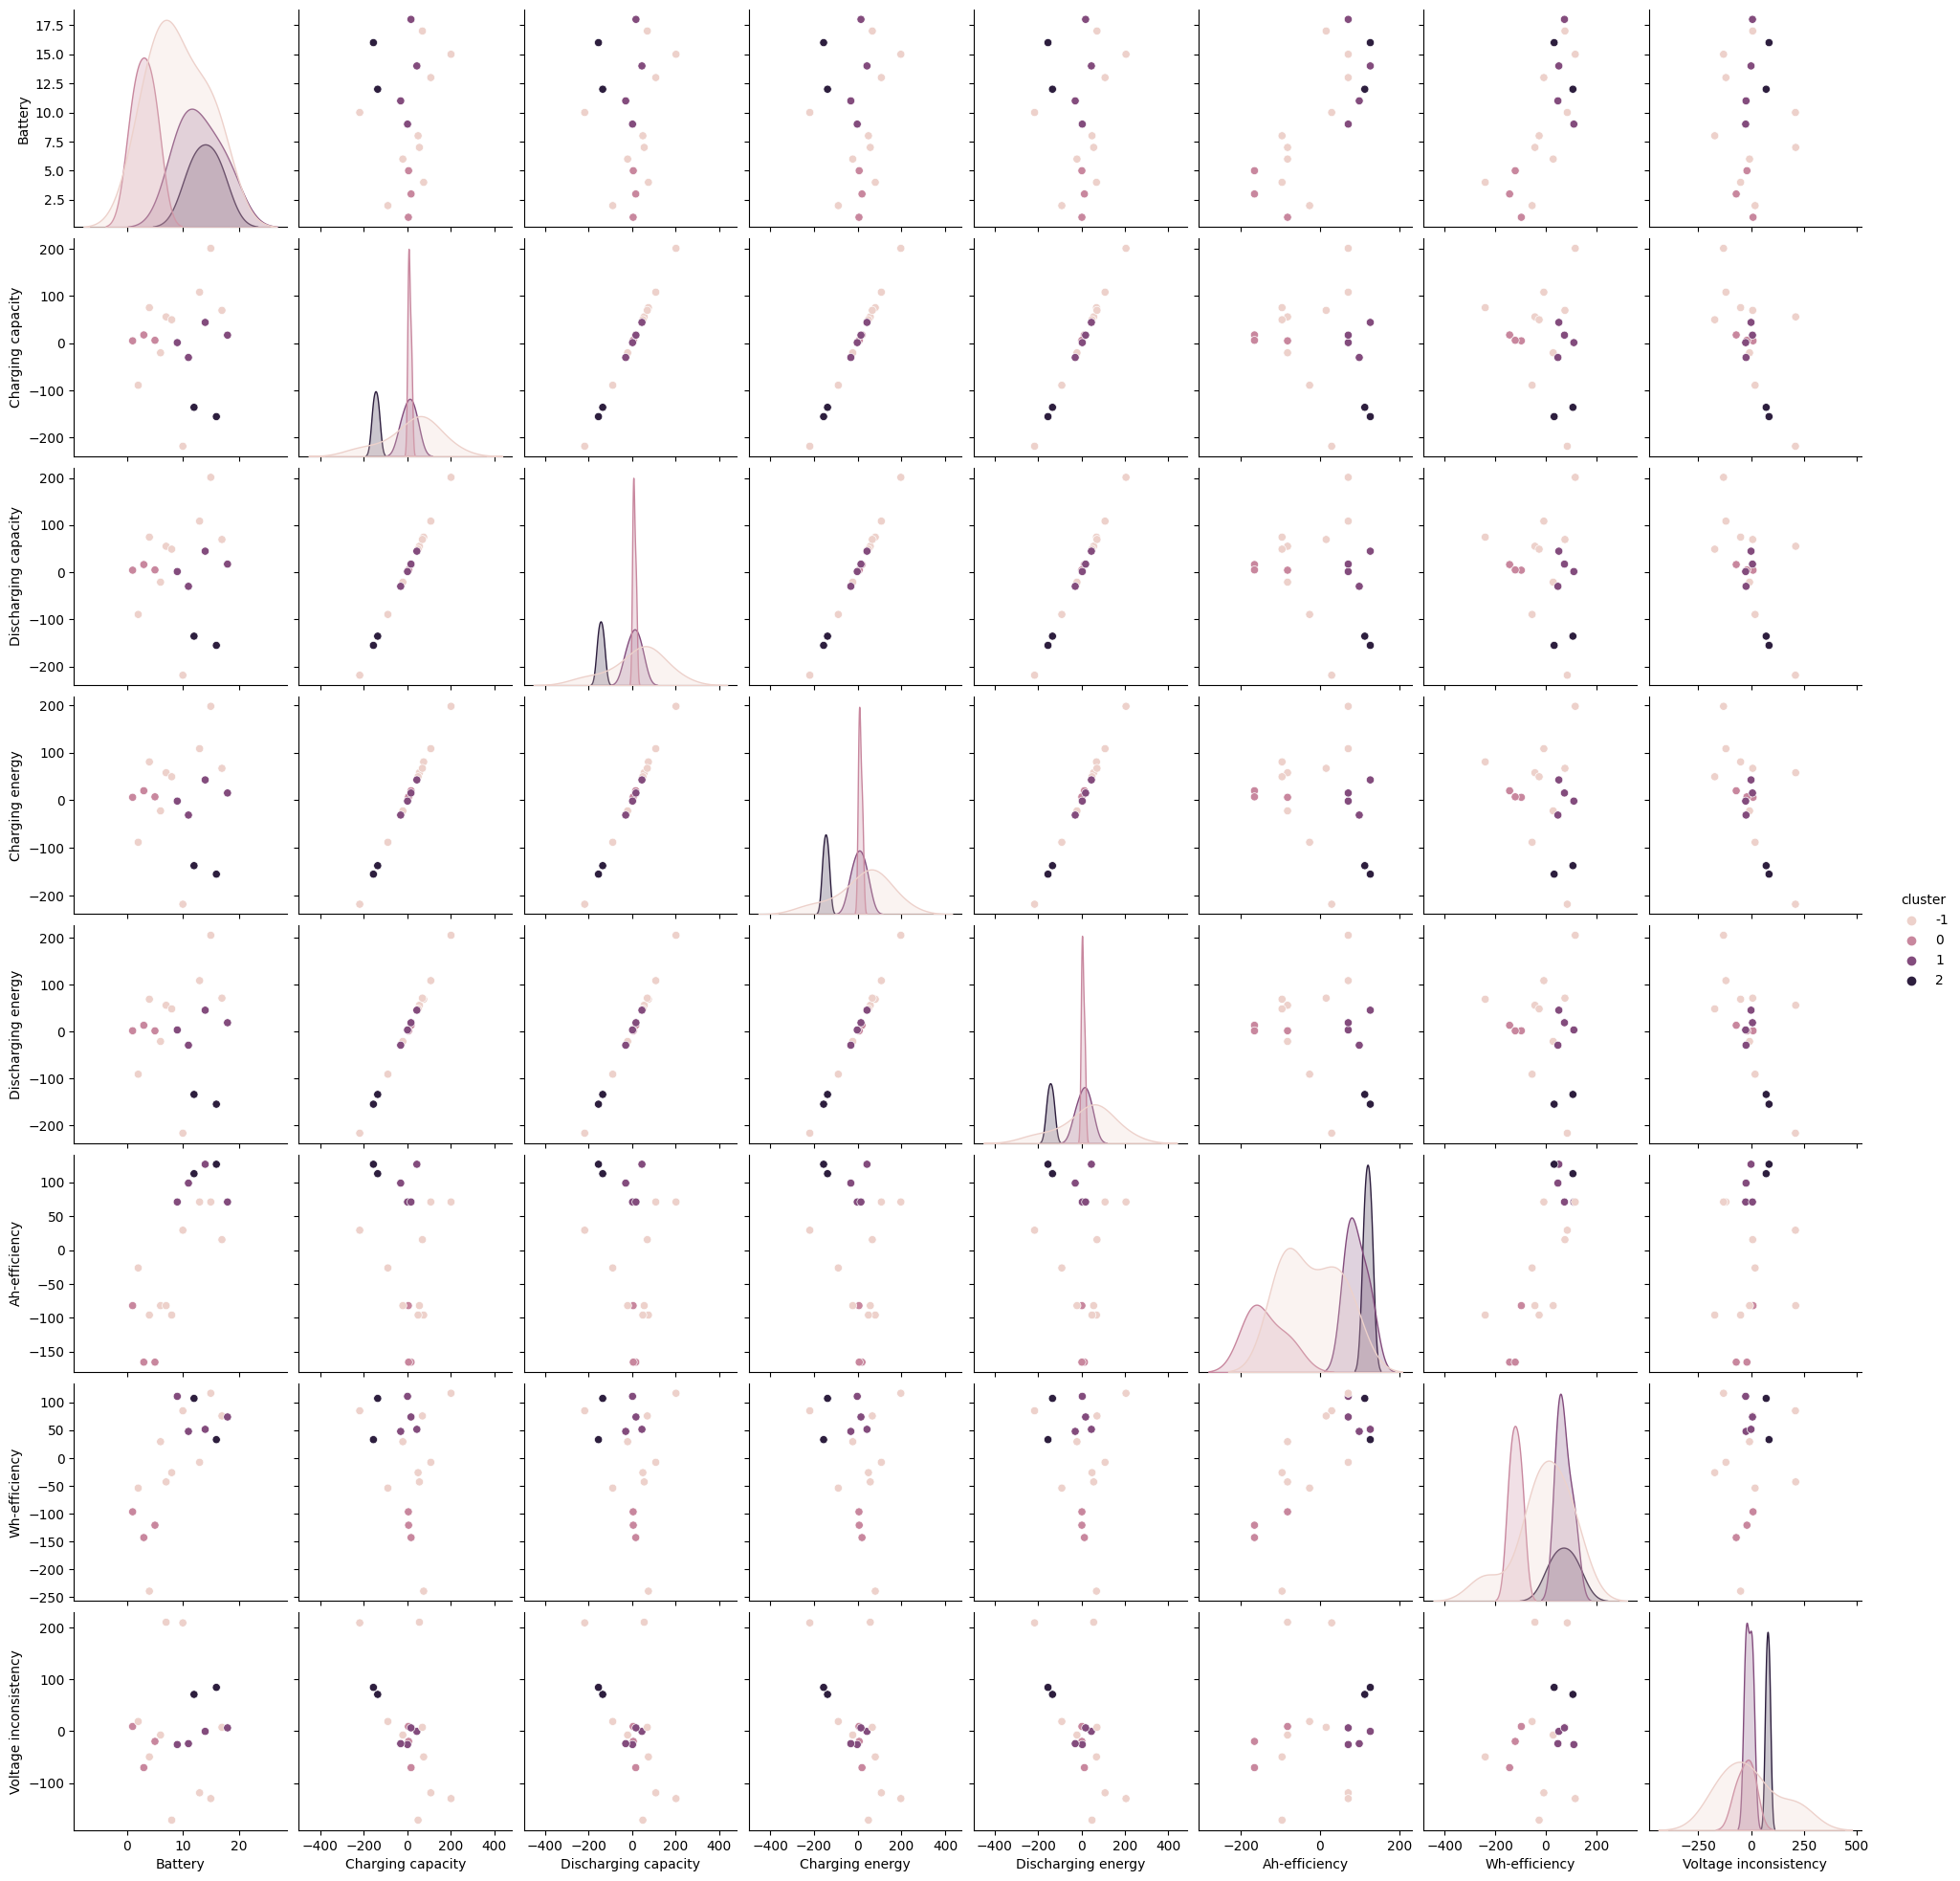

In [153]:
sns.color_palette("pastel")


battery_data["cluster"] = dbscan.labels_.tolist()

sns.pairplot(battery_data, hue= "cluster");
plt.show()

# Estimating Eps and MinPts for DBSCAN

In [139]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [140]:
battery_data = pd.read_csv('standardized_battery_data.csv')

In [141]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(battery_data)
distances, indices = neighbors_fit.kneighbors(battery_data)


distances = distances[:,4]
indices = indices[:,4]
distances = np.sort(distances)


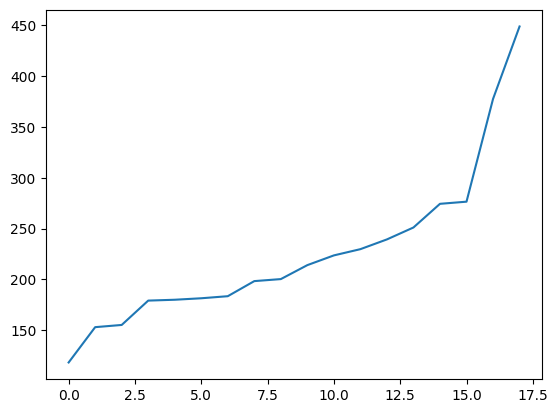

In [142]:
plt.plot(distances)
plt.show()

## Perform PCA to visualize the clusters

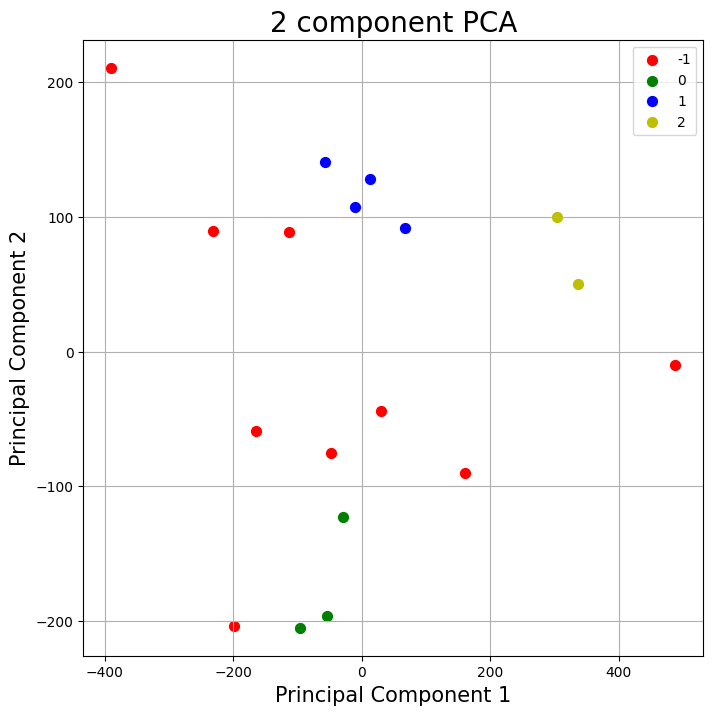

In [154]:
# PCA to reduce the dimensions of the data and visualize the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(battery_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, battery_data[['cluster']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [-1, 0, 1, 2]
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()